## Projeto Turma 970 - Machine Learning I

Aluno: Joelson Ferreira (https://www.linkedin.com/in/joelsons/)

Professor: Igor Garcia (https://www.linkedin.com/in/igorgbs/)

O objetivo deste projeto é aplicar técnicas de Machine Learning para determinar se o sujeito vai ter ou não avc a partir de uma base de dados fornecida.

O conjunto de dados utilizado para este projeto é "Stroke Prediction Dataset" (Previsão de AVC), disponível no Kaggle: https://www.kaggle.com/competitions/playground-series-s3e2/data?select=train.csv.

As colunas desse dataset são:

- id (id): Identificador único
- gender (gênero): "Male" (Masculino), "Female" (Feminino) or "Other" (Outro);
- age (idade): idade do paciente;
- hypertension (hipertensão): 0 se o paciente não tiver hipertensão, 1 se o paciente tiver hipertensão
- heart_disease (doença cardíaca): 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca;
- ever_married (casado): "No" or "Yes";
- work_type (tipo de trabalho): "children" (criança), "Govt_jov" (Servidor público), "Never_worked" (Nunca_trabalhou), "Private" (Empresa Privada) ou "Self-employed" (Autônomo);
- Residence_type (Tipo de residência): “Rural" ou “Urban" (Urbano);
- avg_glucose_level: Nível médio de glicose no sangue;
- bmi (IMC): índice de massa corporal;
- smoking_status (condição de fumante): “formerly smoked" (ex-fumante), “never smoked" (nunca fumou), “smokes" (fuma) ou “Unknown" (Desconhecido);
- stroke (acidente vascular cerebral): 1 se o paciente teve acidente vascular cerebral ou 0 se não.

### Importações e visualização da base

In [130]:
# Importando o pandas
import pandas as pd
# Importando o matplotlib
import matplotlib.pyplot as plt
# Importando o Numpy - linear algebra
import numpy as np 
# Importanto o seaborn
import seaborn as sns

In [29]:
# Importando a base de dados
base = pd.read_csv('train.csv')

In [30]:
# Visualizando as 3 primeiras linhas
base.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0


In [31]:
# Visualizando as 3 últimas linhas
base.tail(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0
15303,15303,Female,14.0,0,0,No,Private,Rural,85.12,24.7,never smoked,0


In [32]:
# Verificando o tamanho da base
base.shape

(15304, 12)

### Visualizando um resumo das informações

In [33]:
# Verificando as informações 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [142]:
# Convertendo as colunas de float64 e int64 para int32

base['age'] = base['age'].astype(int)
base['hypertension'] = base['hypertension'].astype(int)
base['heart_disease'] = base['heart_disease'].astype(int)
base['stroke'] = base['stroke'].astype(int)

# Removendo a coluna "id" da base
base = base.drop('id', axis=1)

In [143]:
# Verificando as informações 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  int32  
 2   hypertension       15304 non-null  int32  
 3   heart_disease      15304 non-null  int32  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int32  
dtypes: float64(2), int32(4), object(5)
memory usage: 1.1+ MB


In [144]:
# Verificando as informações estatísticas
base.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.404012,0.049726,0.023327,89.039853,28.112721,0.041296
std,21.470463,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [145]:
# Verificando a quantidade de valores diferentes na base (cardinalidade)
base.nunique()

gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3740
bmi                   407
smoking_status          4
stroke                  2
dtype: int64

### Visualizando de forma gráfica

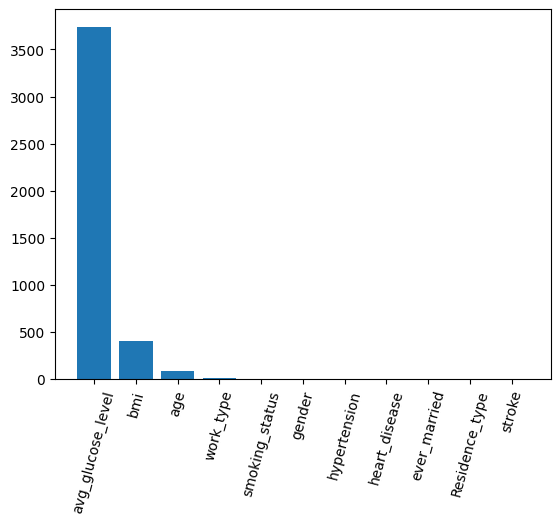

In [146]:
# Visualizando a informação acima de forma gráfica
fig, ax = plt.subplots()

ax.bar(base.nunique().sort_values(ascending=False).index, base.nunique().sort_values(ascending=False).values)

ax.tick_params(axis='x',labelrotation=75)

plt.show()

Verificando a coluna "avg_glucose_level"

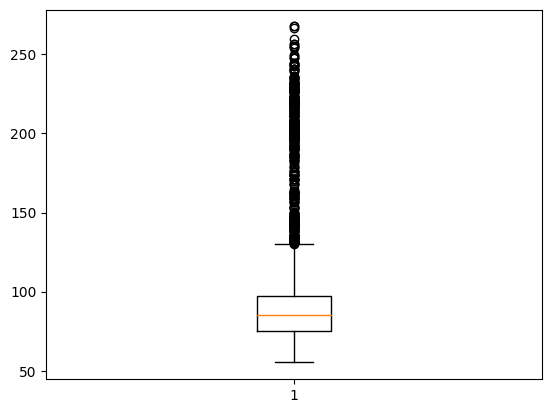

In [147]:
# Verificando a coluna "avg_glucose_level" (Nível médio de glicose no sangue)
fig, ax = plt.subplots()

ax.boxplot(base.avg_glucose_level)

plt.show()

In [149]:
# Verificando a coluna "avg_glucose_level" (Nível médio de glicose no sangue) com "describe()".
base.avg_glucose_level.describe()

count    15304.000000
mean        89.039853
std         25.476102
min         55.220000
25%         74.900000
50%         85.120000
75%         96.980000
max        267.600000
Name: avg_glucose_level, dtype: float64

In [150]:
# Determinando o interquartil
Q1 = base.avg_glucose_level.describe()['25%']
Q3 = base.avg_glucose_level.describe()['75%']
interquartil = Q3 - Q1

# Calculando o valor máximo
vlr_max = Q3 + 1.5*interquartil

In [151]:
# Filtrando os valores acima do máximo
base[base.avg_glucose_level > vlr_max]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
22,Male,71,0,1,Yes,Self-employed,Urban,196.61,33.5,formerly smoked,0
33,Male,58,0,0,Yes,Private,Rural,223.36,33.2,smokes,0
61,Female,78,0,0,Yes,Self-employed,Urban,182.90,32.9,never smoked,1
69,Female,68,0,0,Yes,Self-employed,Urban,196.58,34.8,Unknown,0
72,Male,38,0,0,Yes,Self-employed,Rural,135.74,35.6,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15131,Male,66,0,1,Yes,Self-employed,Rural,204.05,30.5,formerly smoked,0
15138,Female,76,0,1,Yes,Self-employed,Urban,207.96,34.5,formerly smoked,0
15195,Male,64,0,0,Yes,Govt_job,Urban,205.77,43.7,never smoked,0
15253,Male,66,1,0,Yes,Self-employed,Rural,205.43,26.3,never smoked,0


Verificando a coluna "bmi"

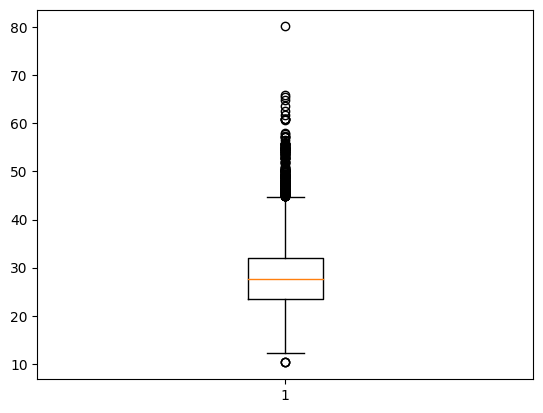

In [152]:
# Verificando a coluna "bmi" (IMC: índice de massa corporal)
fig, ax = plt.subplots()

ax.boxplot(base.bmi)

plt.show()

In [153]:
# Verificando a coluna "bmi" (IMC: índice de massa corporal) com "describe()".
base.bmi.describe()

count    15304.000000
mean        28.112721
std          6.722315
min         10.300000
25%         23.500000
50%         27.600000
75%         32.000000
max         80.100000
Name: bmi, dtype: float64

In [154]:
# Determinando o interquartil
Q1_2 = base.bmi.describe()['25%']
Q3_2 = base.bmi.describe()['75%']
interquartil_2 = Q3_2 - Q1_2

# Calculando o valor máximo
vlr_max_2 = Q3_2 + 1.5*interquartil_2

In [155]:
# Filtrando os valores acima do máximo
base[base.bmi > vlr_max_2]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
127,Female,61,0,0,Yes,Govt_job,Rural,74.36,48.2,never smoked,0
471,Female,37,0,0,No,Private,Rural,76.44,45.2,Unknown,0
561,Male,60,0,0,Yes,Private,Urban,99.96,48.8,formerly smoked,0
693,Female,38,0,0,Yes,Private,Urban,93.04,50.1,never smoked,0
777,Male,54,0,0,Yes,Private,Urban,103.25,46.3,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
14651,Female,18,0,0,No,Private,Urban,82.85,46.9,Unknown,0
14824,Female,76,1,0,Yes,Self-employed,Rural,190.32,57.2,never smoked,0
15115,Female,27,0,0,No,Private,Urban,112.41,53.9,smokes,0
15171,Female,42,0,0,Yes,Private,Rural,86.73,47.1,smokes,0


Verificando a coluna "age"

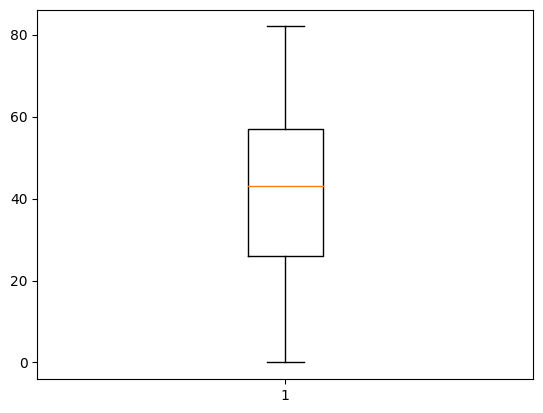

In [156]:
# Verificando a coluna "age" (idade)
fig, ax = plt.subplots()

ax.boxplot(base.age)

plt.show()

In [157]:
# Verificando a coluna "bmi" (IMC: índice de massa corporal) com "describe()".
base.age.describe()

count    15304.000000
mean        41.404012
std         21.470463
min          0.000000
25%         26.000000
50%         43.000000
75%         57.000000
max         82.000000
Name: age, dtype: float64

### Outros gráficos

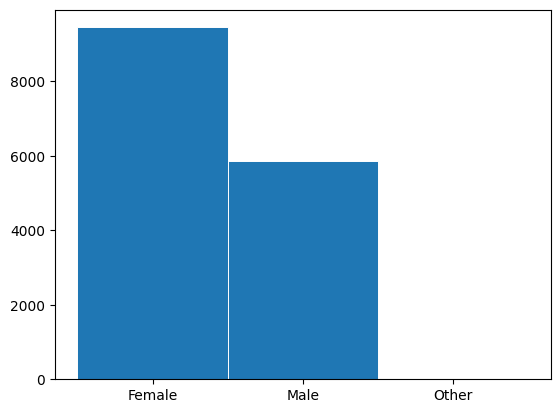

In [158]:
# Comparando as quantidades "gender" (gênero)
fig, ax = plt.subplots()

x=base.gender.value_counts().index.astype('str')
y=base.gender.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

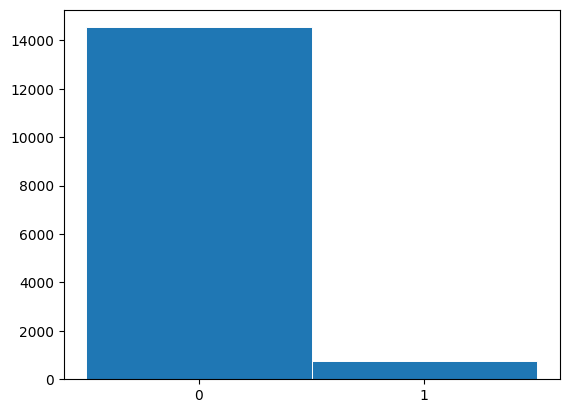

In [159]:
# Comparando as quantidades "hypertension" (hipertensão)
fig, ax = plt.subplots()

x=base.hypertension.value_counts().index.astype('str')
y=base.hypertension.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

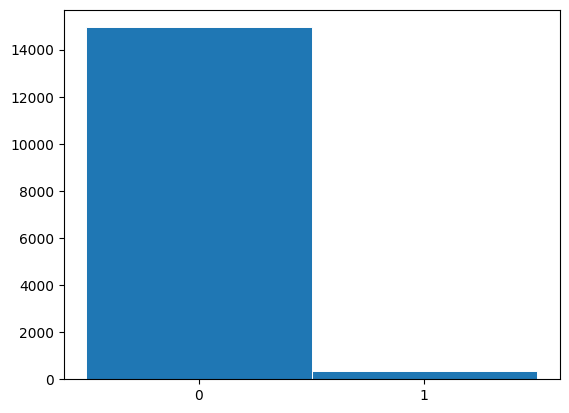

In [160]:
# Comparando as quantidades "heart_disease" (doença cardíaca)
fig, ax = plt.subplots()

x=base.heart_disease.value_counts().index.astype('str')
y=base.heart_disease.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

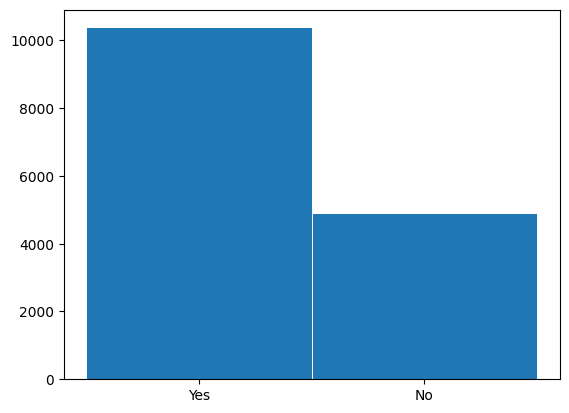

In [161]:
# Comparando as quantidades "ever_married" (Casado)
fig, ax = plt.subplots()

x=base.ever_married.value_counts().index.astype('str')
y=base.ever_married.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

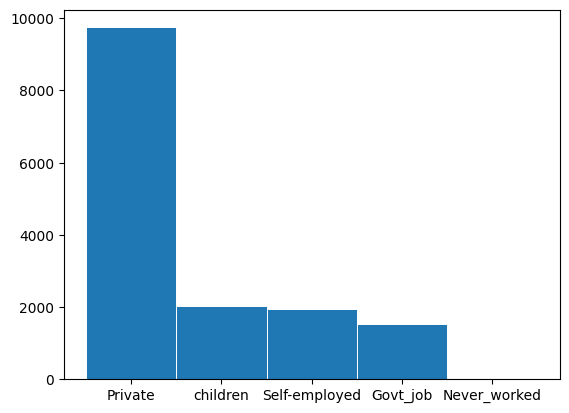

In [162]:
# Comparando as quantidades "work_type" (tipo_trabalho)
fig, ax = plt.subplots()

x=base.work_type.value_counts().index.astype('str')
y=base.work_type.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

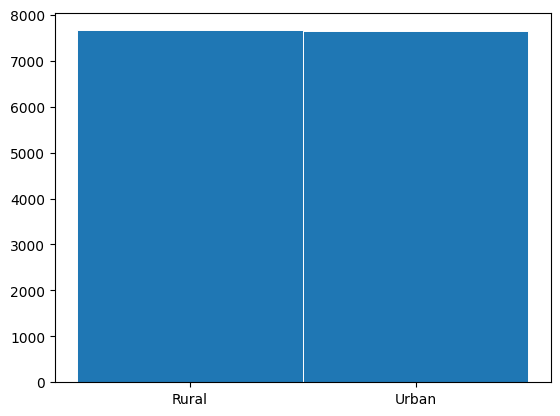

In [163]:
# Comparando as quantidades "Residence_type" (Tipo_residência)
fig, ax = plt.subplots()

x=base.Residence_type.value_counts().index.astype('str')
y=base.Residence_type.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

In [164]:
base.Residence_type.value_counts().values

array([7664, 7640], dtype=int64)

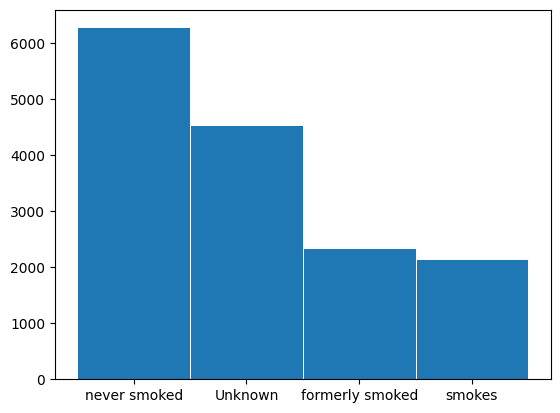

In [165]:
# Comparando as quantidades "smoking_status" (condição de fumante)
fig, ax = plt.subplots()

x=base.smoking_status.value_counts().index.astype('str')
y=base.smoking_status.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

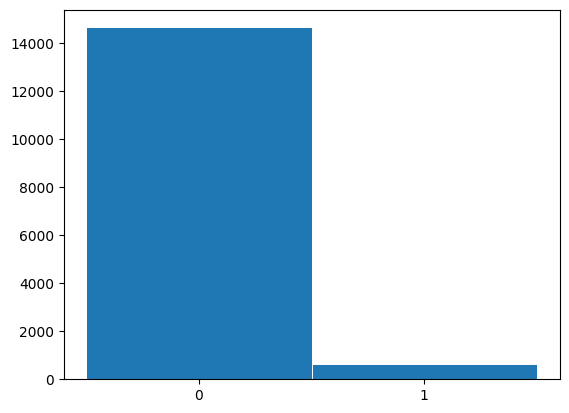

In [166]:
# Comparando as quantidades "stroke" (acidente vascular cerebral)
fig, ax = plt.subplots()

x=base.stroke.value_counts().index.astype('str')
y=base.stroke.value_counts().values

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

plt.show()

In [167]:
base.stroke.value_counts().values


array([14672,   632], dtype=int64)

Matriz de correlação

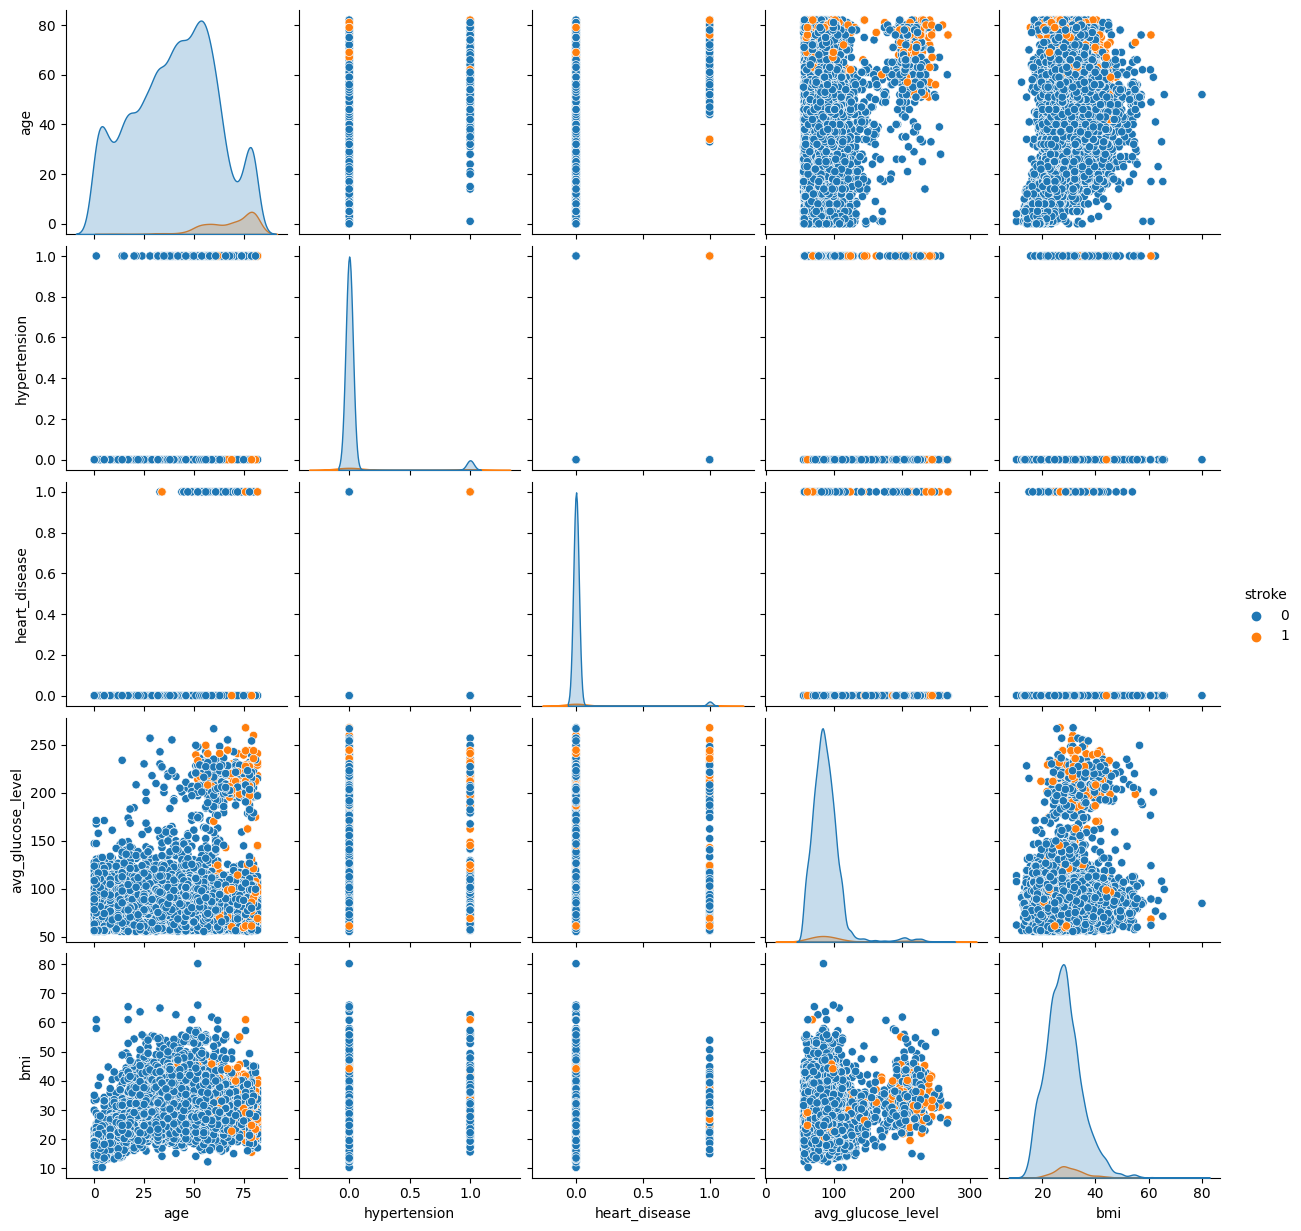

In [168]:
# Utilizando o seaborn criar uma matriz para mostrar a correlação de cada par de variáveis

sns.pairplot(base,hue="stroke") # Kernel Density Estimation - Mede a chance de uma variável aleatória assumir determinado valor
plt.show()

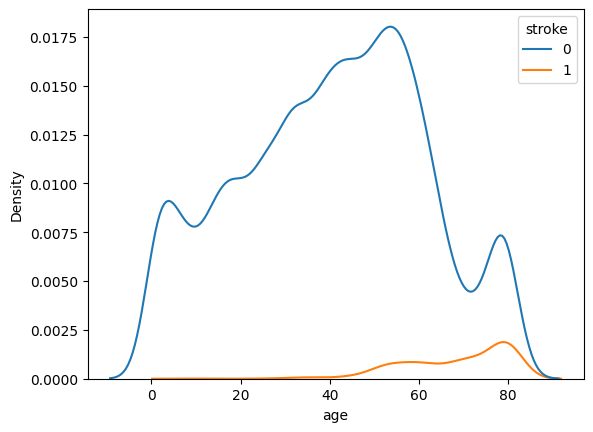

In [132]:
# Fazendo o kde (Kernel Density Estimation) para a idade
sns.kdeplot(data=base, x='age', hue='stroke')
plt.show()

### Heatmap de correlação

In [133]:

# Subdivisão do DataFrame em dois subconjuntos, com base nos dtypes da coluna

df_num = base.select_dtypes(include=[np.number])  # dtypes numérico (float)
#df_num1 = df_num1.drop(columns=['Latitude', 'Longitude', 'Calling Code'])

df_cat = base.select_dtypes(include =[object])    # dtypes objeto

In [136]:
# Gerando estatísticas descritivas: aquelas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo NaN valores.

df_cat.describe().T

,count,unique,top,freq
gender,15304,3,Female,9446
ever_married,15304,2,Yes,10385
work_type,15304,5,Private,9752
Residence_type,15304,2,Rural,7664
smoking_status,15304,4,never smoked,6281


In [137]:
# Estatíticas descritivas para as colunas numéricas

df_num.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.404012,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.470463,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.000000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [138]:
# Verificando a correlação entre os dados numéricos
df_num.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.003328,-0.012186,-0.005429,0.001450,-0.013436,-0.017290
age,-0.003328,1.000000,0.232491,0.193261,0.108849,0.391123,0.261138
hypertension,-0.012186,0.232491,1.000000,0.074178,0.122834,0.106665,0.145895
heart_disease,-0.005429,0.193261,0.074178,1.000000,0.137147,0.054583,0.111518
avg_glucose_level,0.001450,0.108849,0.122834,0.137147,1.000000,0.108142,0.149273
bmi,-0.013436,0.391123,0.106665,0.054583,0.108142,1.000000,0.065393
stroke,-0.017290,0.261138,0.145895,0.111518,0.149273,0.065393,1.000000


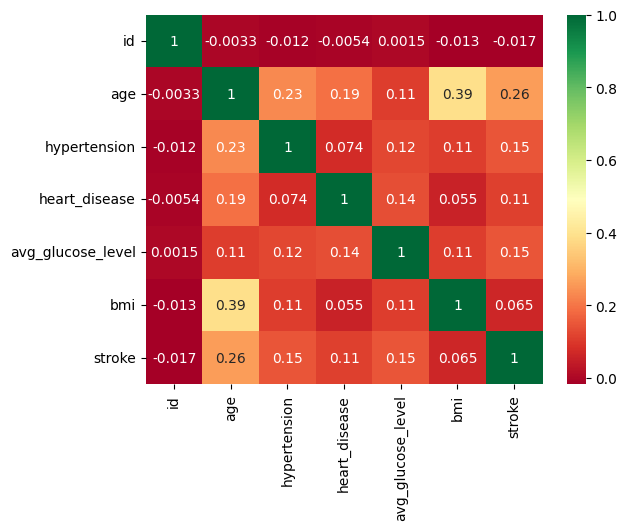

In [140]:
# Verificando a correlação dos dados numéricos usando mapa de calor
# Atenção: correlação não implica em causalidade

sns.heatmap(df_num.corr(),annot=True,cmap='RdYlGn')
plt.show()